In [1]:
import numpy as np
import xarray as xr

%matplotlib inline
from matplotlib import pyplot as plt

import stagem1.temporal_integration as sti
import xsimlab as xs

### Main parameters

In [2]:
#Main parameters
d2s=86400 #24h in s
h2s=3600  #1h in s
w2=2*2*np.pi/86400 #wave pulsation
km=1e3
dt=1*h2s # model step
L=100*km
k2=2*np.pi/L

um=0.1
uw=0.1
w=w2
k=k2


### Add trajectories on velocity fieldvelocity 

#### Trajectories for several particules

In [3]:
x=sti.SetUp(advected=0)

In [4]:
x.out_ds

<xarray.Dataset>
Dimensions:             (a: 100, otime: 143, time: 144)
Coordinates:
  * a                   (a) float64 0.0 2.02e+03 4.04e+03 ... 1.98e+05 2e+05
  * otime               (otime) int64 0 3600 7200 10800 ... 504000 507600 511200
  * time                (time) int64 0 3600 7200 10800 ... 507600 511200 514800
    otime_day           (otime) float64 0.0 0.04167 0.08333 ... 5.875 5.917
Data variables:
    init__N             int64 100
    init__maxi          float64 2e+05
    init__mini          int64 0
    position__p         (otime, a) float64 0.0 2.02e+03 ... 2.51e+05 2.532e+05
    velocity__advected  int64 0
    velocity__k         float64 6.283e-05
    velocity__um        float64 0.1
    velocity__uw        float64 0.1
    velocity__v         (otime, a) float64 0.2 0.1992 0.1968 ... 0.05568 0.06803
    velocity__w         float64 0.0001454
    position_km         (otime, a) float64 0.0 2.02 4.04 ... 248.9 251.0 253.2
    displacement        (otime, a) float64 0.0 0.0 0.0 ... 5.305e+04 5.315e+04

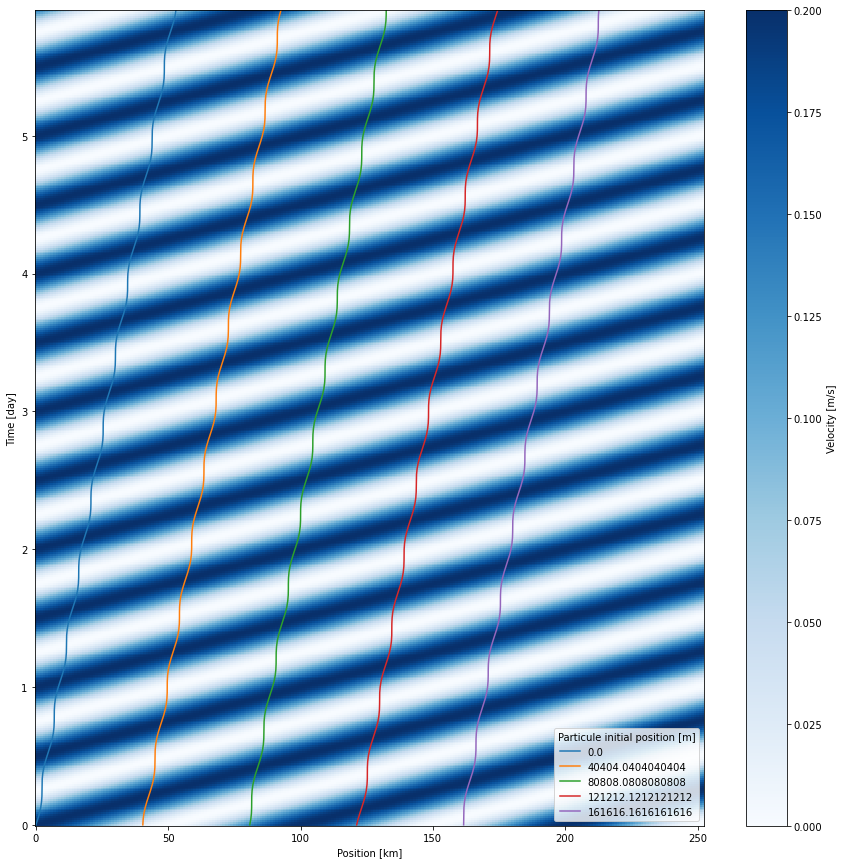

In [13]:
x.velocity_field().plot(y='t', figsize=(15,15), cmap='Blues')
x.out_ds.position_km.isel(a=slice(0,None,20)).plot(y='otime_day', hue='a')

#### Trajectories for different integration methods

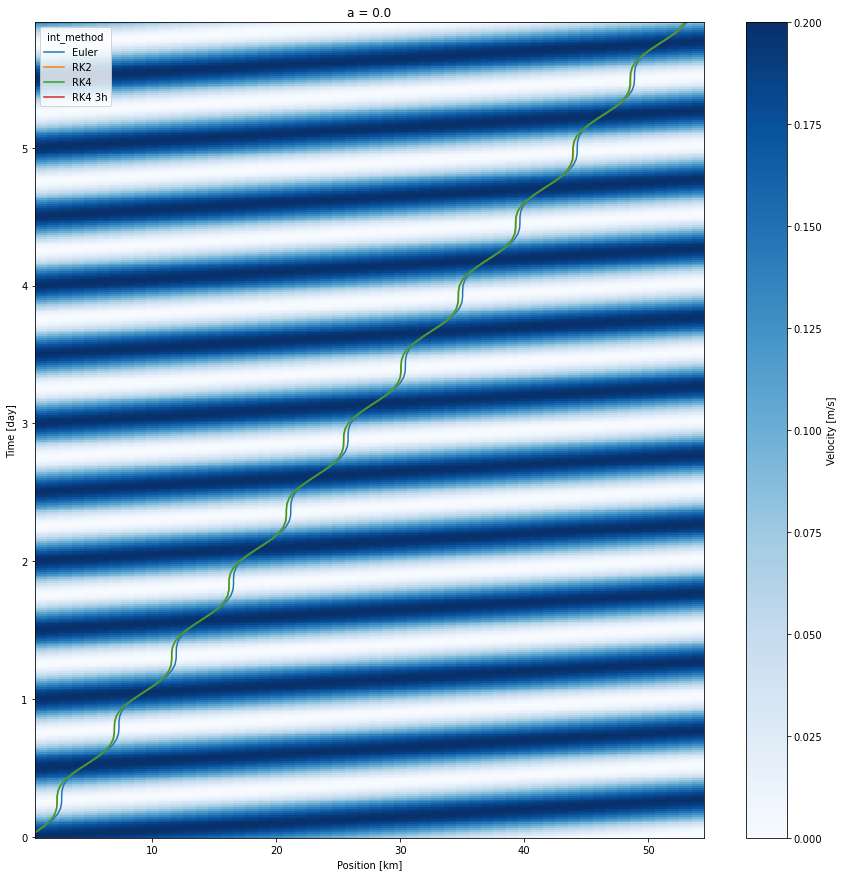

In [22]:
compx=sti.Temp_Int_Comp(x,advected=0)
vf=x.velocity_field()
vf=vf.where(vf.x.where(vf.x<55,  drop=True)>0, drop=True)
fg=vf.plot(y='t',figsize=(15,15), cmap='Blues')
compx.ds.position_km.isel(a=0,int_method=[0,1,2,3]).plot(y="otime_day",hue="int_method", ax=fg.axes)


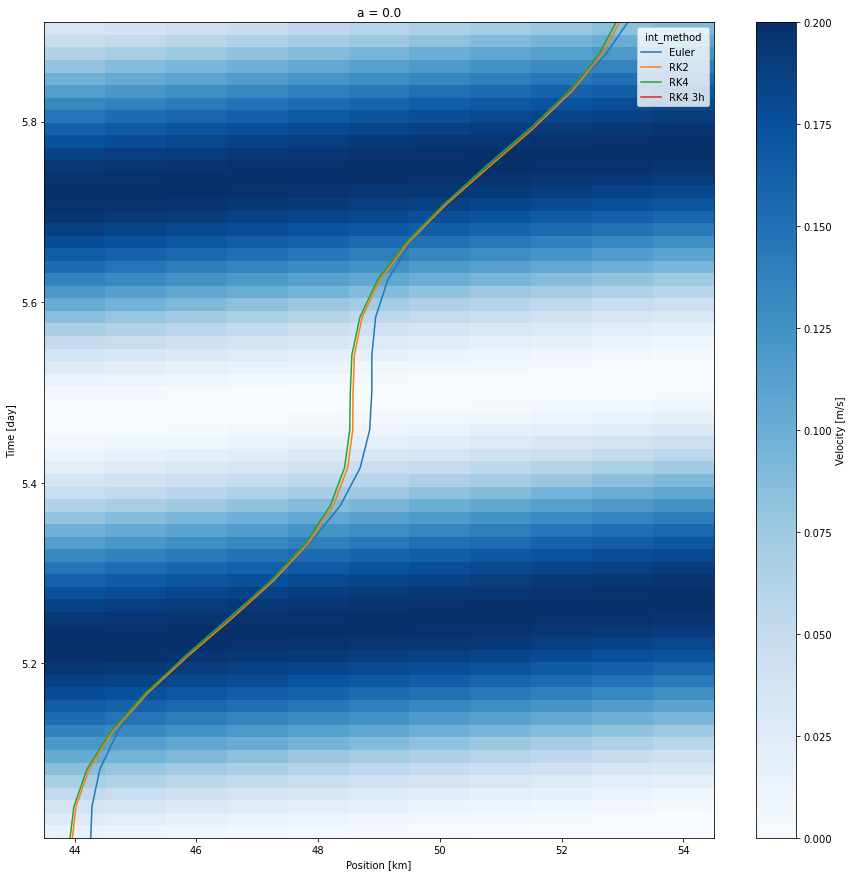

In [24]:
compx=sti.Temp_Int_Comp(x,advected=0)
vf=vf.where(vf.t>5, drop=True).where(vf.x.where(vf.x<55,  drop=True)>43, drop=True)
fg=vf.plot(y='t',figsize=(15,15), cmap='Blues')
compx.ds.position_km.isel(a=0,int_method=[0,1,2,3]).plot(y="otime_day",hue="int_method", ax=fg.axes)


### Case 1: advected, uw=w/k

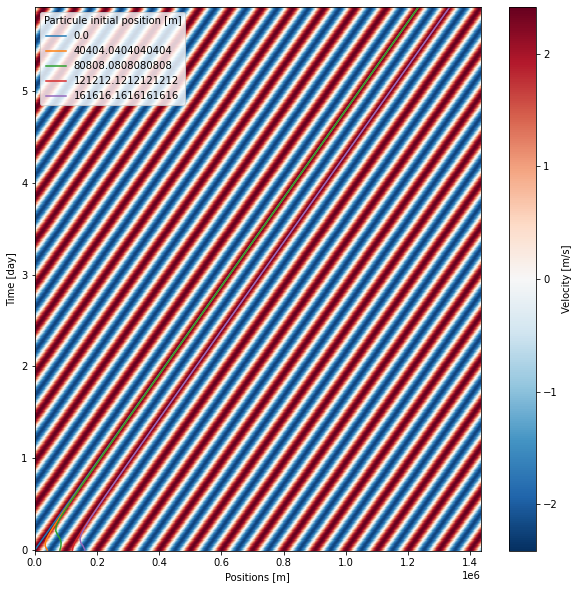

In [21]:
x.update_parameters(velocity__uw=w2/k2)
x.velocity_field().plot(y='t',figsize=(10,10), cmap='RdBu_r')
x["p"].isel(a=slice(0,None,20)).plot(y='otime_day', hue='a')

### Case unadvected, uw=w/k-um

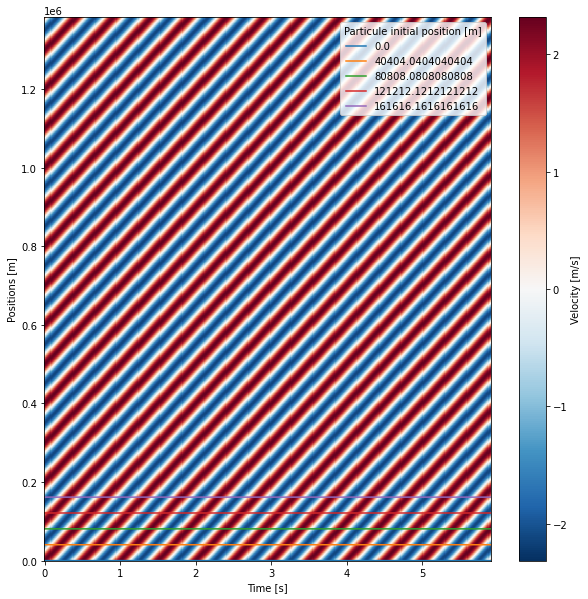

In [22]:
y=sti.SetUp()
y.update_parameters(velocity__uw=w2/k2-um, velocity__advected=0)
y.velocity_field().T.plot(figsize=(10,10), cmap='RdBu_r')
y["p"].isel(a=slice(0,None,20)).plot(x='otime', hue='a')

### Case 3: uw<w/k

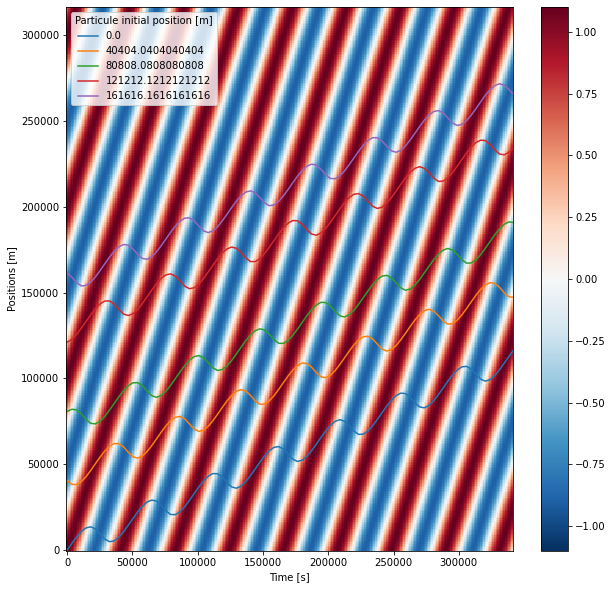

In [41]:
z=sti.SetUp(uw=1)
z.velocity_field().T.plot(figsize=(10,10))
z["p"].isel(a=slice(0,None,20)).plot(x='otime', hue='a')

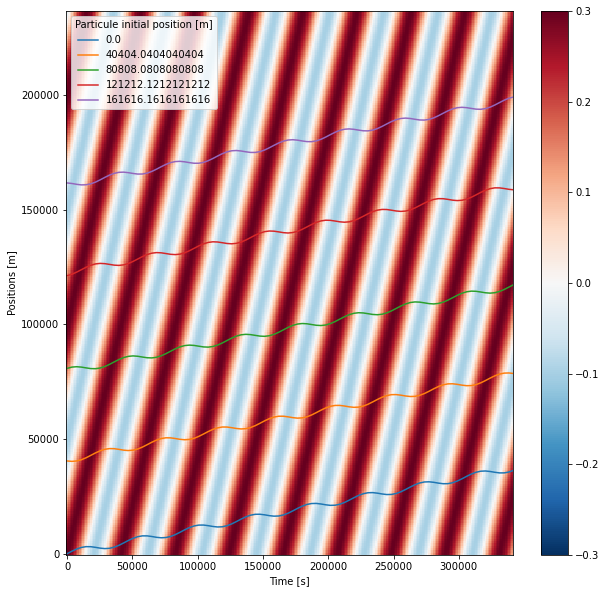

In [42]:
a=sti.SetUp(uw=0.2)
a.velocity_field().T.plot(figsize=(10,10))
a["p"].isel(a=slice(0,None,20)).plot(x='otime', hue='a')